In [2]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=43ebcfea559b78873e5b791c856e6632f6da5f3a755a670d5f7f43870487205d
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori, association_rules
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [4]:
movies = pd.read_csv('/content/my_movies.csv')
movies


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [5]:
movies1= movies.iloc[:,5:]
movies1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [8]:
movies1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sixth Sense,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
Gladiator,10.0,0.7,0.483046,0.0,0.25,1.0,1.0,1.0
LOTR1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Patriot,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
LOTR2,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter2,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
LOTR,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Braveheart,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Green Mile,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0


In [9]:
movies1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [10]:
movies1.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

In [12]:
movies1.shape
item_sets = {}
te = TransactionEncoder()
te_ary = te.fit(movies1).transform(movies1)

In [14]:
ap = pd.DataFrame(te_ary,columns=te.columns_)

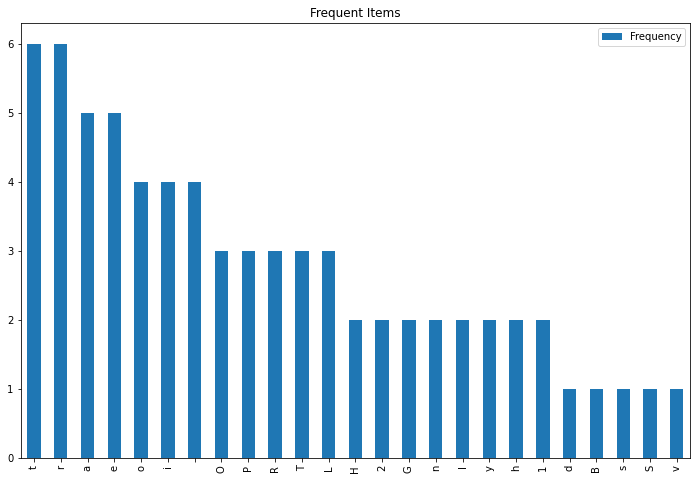

In [15]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar', figsize=(12,8), title="Frequent Items")
plt.show()

##Apriori Algorithm

In [16]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [17]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [21]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(movies1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [19]:
confs = []

In [22]:
for i in [0.005,0.001,0.003,0.007]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

In [23]:
all_conf = pd.concat(confs,axis=1)


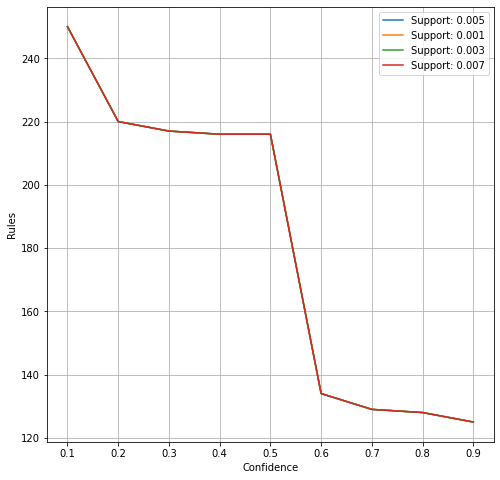

In [24]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()


#Conclusion
As shown in the graph above:

1. Lower the Confidence level is higher the no. of rules.
2. Higher the Support, lower the no. of rules.

For Support = 0.005 and Confidence = 0.4

In [25]:
ap_final = apriori(ap,0.005,True)

In [26]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [27]:
rules_final[rules_final['confidence']>0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(H),( ),0.2,0.4,0.2,1.000000,2.500000,0.12,inf
5,(M),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
7,(P),( ),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8
8,(S),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf
11,( ),(e),0.4,0.5,0.4,1.000000,2.000000,0.20,inf
...,...,...,...,...,...,...,...,...,...
113718,"( , 2)","(o, P, r, t, H, e, a, y)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113722,"(H, 2)","(o, P, r, t, , e, a, y)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113724,"(e, 2)","(o, P, r, t, , H, a, y)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
113726,"(2, a)","(o, P, r, t, , H, e, y)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf


In [28]:
support = rules_final["support"]
confidence = rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

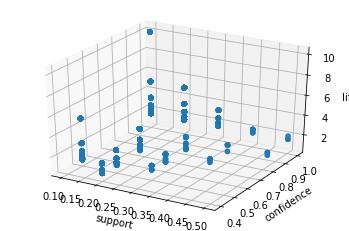

In [29]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

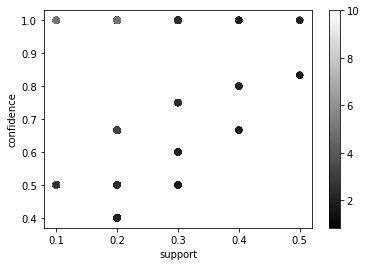

In [30]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")